In [ ]:
import numpy as np
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split,GridSearchCV


In [ ]:
!pip install lazypredict


In [ ]:
import numpy as np
import pandas as pd
from lazypredict.Supervised import LazyClassifier


In [ ]:
# prompt: read csv file named ecomm_data

df = pd.read_csv('ecomm_data.csv')


In [ ]:
# prompt: get unique value for every char varialble coulumns

for column in df_char:
  unique_values = df_char[column].unique()
  print(f"Unique values for column {column}: {unique_values}")


Unique values for column PreferredLoginDevice: ['Mobile' 'Computer']
Unique values for column PreferredPaymentMode: ['Debit Card' 'COD' 'Credit Card' 'E wallet' 'UPI']
Unique values for column Gender: ['Female' 'Male']
Unique values for column PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Grocery']
Unique values for column MaritalStatus: ['Single' 'Divorced' 'Married']


In [ ]:
# replacing of duplicate in PreferredPaymentMode
df.head()
replacement_mapping = {
    'CC': 'Credit Card',
    'Cash on Delivery': 'COD'
}

df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(replacement_mapping)

df['PreferredPaymentMode'].unique()

0

In [ ]:
# replacing of PreferredLoginDevice
df.head()
replacement_mapping_PreferredLoginDevice= {
    'Mobile Phone': 'Mobile',
    'Phone': 'Mobile'
}

df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(replacement_mapping_PreferredLoginDevice)

df['PreferredLoginDevice'].unique()

array(['Mobile', 'Computer'], dtype=object)

In [ ]:
# replacing of PreferedOrderCat
df.head()
replacement_mapping_PreferedOrderCat= {
    'Mobile Phone': 'Mobile',
}

df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(replacement_mapping_PreferedOrderCat)

df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Others', 'Fashion', 'Grocery'],
      dtype=object)

In [ ]:
pd.set_option('display.float_format', '{:.5f}'.format)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# get the number of null values in each row

df.isnull().sum()


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
# get all the values in Tenure field

tenure_values = df['Tenure'].unique()
print(tenure_values)


[ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]


In [ ]:
pd.set_option('display.float_format', '{:.5f}'.format)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# remove all the missing value rows

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  NumberOfAddress        

In [ ]:
# Create dummy variables for all character/categorical variables, following several steps:


df_char = df.select_dtypes(include=['object'])
df_char.head()


,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile,Debit Card,Female,Laptop & Accessory,Single
3,Mobile,Debit Card,Male,Laptop & Accessory,Single
5,Computer,Debit Card,Female,Mobile,Single
11,Mobile,Debit Card,Male,Fashion,Single
12,Mobile,COD,Male,Mobile,Single


In [ ]:
# b. df.num <- Put all initially numeric variables together


df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head(3)


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.00000,3,6.00000,3.00000,3,2,9,1,11.00000,1.00000,1.00000,5.00000,160
3,50004,1,0.00000,3,15.00000,2.00000,4,5,8,0,23.00000,0.00000,1.00000,3.00000,134
5,50006,1,0.00000,1,22.00000,3.00000,5,5,2,1,22.00000,4.00000,6.00000,7.00000,139


In [ ]:

# Automatically dummify the character data
df_char = pd.get_dummies(df_char)
df_char.head()


,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile,PreferredPaymentMode_COD,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
3,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True
5,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True
11,False,True,False,False,True,False,False,False,True,True,False,False,False,False,False,False,True
12,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True


In [ ]:

# concatenating the charecter valued features and numeric valued.
data = pd.concat([df_num, df_char], axis=1)
data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CustomerID                           3774 non-null   int64  
 1   Churn                                3774 non-null   int64  
 2   Tenure                               3774 non-null   float64
 3   CityTier                             3774 non-null   int64  
 4   WarehouseToHome                      3774 non-null   float64
 5   HourSpendOnApp                       3774 non-null   float64
 6   NumberOfDeviceRegistered             3774 non-null   int64  
 7   SatisfactionScore                    3774 non-null   int64  
 8   NumberOfAddress                      3774 non-null   int64  
 9   Complain                             3774 non-null   int64  
 10  OrderAmountHikeFromlastYear          3774 non-null   float64
 11  CouponUsed                         

In [ ]:
#  create a csv file named churn_prepered from data

data.to_csv('churn_prepered.csv', index=False)


In [ ]:
df2 = pd.read_csv('churn_prepered.csv')


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CustomerID                           3774 non-null   int64  
 1   Churn                                3774 non-null   int64  
 2   Tenure                               3774 non-null   float64
 3   CityTier                             3774 non-null   int64  
 4   WarehouseToHome                      3774 non-null   float64
 5   HourSpendOnApp                       3774 non-null   float64
 6   NumberOfDeviceRegistered             3774 non-null   int64  
 7   SatisfactionScore                    3774 non-null   int64  
 8   NumberOfAddress                      3774 non-null   int64  
 9   Complain                             3774 non-null   int64  
 10  OrderAmountHikeFromlastYear          3774 non-null   float64
 11  CouponUsed                    

In [ ]:
df2.Churn.value_counts()


Churn
0    3143
1     631
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

#Labels are the values we want to predict
y = np.array(df2['Churn'])
#Remove the labels from the features
X= df2.drop(columns=['Churn'], axis = 1)
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_clean=X_train.drop(columns=['CustomerID'])#FireIndicator_fi
X_test_clean=X_test.drop(columns='CustomerID')
print('TrainingFeaturesShape:', X_train_clean.shape)
print('TrainingLabelsShape:', y_train.shape)
print('TestingFeaturesShape:', X_test_clean.shape)
print('TestingLabelsShape:', y_test.shape)
feature_list = list(X_train_clean.columns)


TrainingFeaturesShape: (2830, 30)
TrainingLabelsShape: (2830,)
TestingFeaturesShape: (944, 30)
TestingLabelsShape: (944,)


In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train_clean, X_test_clean, y_train, y_test)
model_dictionary = clf.provide_models(X_train_clean, X_test_clean, y_train, y_test)
models

 28%|██▊       | 8/29 [00:01<00:03,  5.55it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 72%|███████▏  | 21/29 [00:04<00:00,  8.16it/s]

NuSVC model failed to execute
specified nu is infeasible


 97%|█████████▋| 28/29 [00:05<00:00,  7.61it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:05<00:00,  5.30it/s]

[LightGBM] [Info] Number of positive: 492, number of negative: 2338
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 266
[LightGBM] [Info] Number of data points in the train set: 2830, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.173852 -> initscore=-1.558572
[LightGBM] [Info] Start training from score -1.558572


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.96822,0.95756,0.95756,0.96884,0.03816
XGBClassifier,0.96610,0.93251,0.93251,0.96610,0.19484
ExtraTreesClassifier,0.97034,0.92309,0.92309,0.96978,0.33705
LGBMClassifier,0.96398,0.92234,0.92234,0.96376,0.16019
RandomForestClassifier,0.96716,0.90932,0.90932,0.96626,0.45002
BaggingClassifier,0.96186,0.90324,0.90324,0.96102,0.35368
LabelPropagation,0.94492,0.89330,0.89330,0.94508,0.52367
LabelSpreading,0.94492,0.89330,0.89330,0.94508,0.76226
ExtraTreeClassifier,0.93644,0.88238,0.88238,0.93699,0.02716


In [ ]:
np.any(np.isnan(X_train_clean))


False

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(max_depth=1, criterion='gini',
random_state=1)
dtclf.fit(X_train_clean, y_train)
from sklearn.metrics import accuracy_score
dtclf_train_sc = accuracy_score(y_train, dtclf.predict(X_train_clean))
dtclf_test_sc = accuracy_score(y_test, dtclf.predict(X_test_clean))
print('Decisiontreetrain/testaccuracies%.3f/%.3f' % (dtclf_train_sc, dtclf_test_sc))

Decisiontreetrain/testaccuracies0.835/0.845


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import random
#Grid to get best parameters; time consuming,does not to be re­ run each time
random.seed(1299)
hyperparameter_space = {'n_estimators':list(range(2, 102, 2)),
'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
'algorithm': ['SAMME', 'SAMME.R']}
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(AdaBoostClassifier(base_estimator=dtclf,
                                     algorithm='SAMME.R',
                                     random_state=1),
                  param_grid=hyperparameter_space,
                  scoring="accuracy",
                  n_jobs=-1,
                  cv=5)
gs.fit(X_train_clean, y_train)
print("Optimalhyperparametercombination:", gs.best_params_)

KeyboardInterrupt: 

USing desicion tree


In [ ]:
#Keep;justrununtilbestparametersestablised.
#ParameterGrid:Usedtogetbestparametersforbestfit/bestresults.
#Bestparammanuallyeneterdinnextcodechunk,
#thereforenoneedtorerunonce"best"selected,asitslowsdownrun,unlessnewdatau
#Createtheparametergridbasedontheresultsofrandomsearch
#R:rfb<­randomForest﴾as.factor﴾Churn﴿~.,data=train,ntree=500,
#mtry=19,nodesize=1,importance=TRUE﴿
from sklearn.ensemble import RandomForestClassifier

param_grid = {
      'bootstrap': [False,True],#,True],#[True,False],
      'max_depth': [6,10,15],#10,15],#30
      'max_features': [8,5,7,8],#5,6,7,8],#5
      'min_samples_leaf': [4,5,6,7,8],#,4],#5,6,7,8],#4
      'min_samples_split': [10,5,6,7,8],#,8],#5,6,7,8],#23,4
      'n_estimators': [100,48,50,60,70]#,48,50]}#,55,60,65]#60#[50,100,150]
      }
#Createabasedmodel
rf = RandomForestClassifier()
#Instantiatethegridsearchmodel
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 5, n_jobs = 1, verbose = 2)
#Fitthegridsearchtothedata
grid_search.fit(X_train_clean,y_train)

Streaming output truncated to the last 5000 lines.
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=48; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=48; total time=   0.3s
[CV] END boot

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [False, True], 'max_depth': [6, 10, 15],
                         'max_features': [8, 5, 7, 8],
                         'min_samples_leaf': [4, 5, 6, 7, 8],
                         'min_samples_split': [10, 5, 6, 7, 8],
                         'n_estimators': [100, 48, 50, 60, 70]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 48}

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from matplotlib import pyplot as plt #plotting
#CreatingtheRFclassifier
random.seed(1299)
#Use bestfeaturesfromabove
clf = RandomForestClassifier(bootstrap=False,max_depth=15,max_features=8,min_samples_leaf=4,min_samples_split=8,n_estimators=48)
#Trainingthemodelonthetrainingdataset;
clf.fit(X_train_clean, y_train)
#performingpredictionsonthetestdataset
y_pred = clf.predict(X_test_clean)
# #plot AUC
# metrics.plot_roc_curve(clf, X_test_clean, y_test)
plt.show() #AUC.89,.90,.92,.94,.95,vif:.95.9

# Export the trained model as a pickle file
with open('churn_cust_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

print("Random Forest model exported successfully.")

Random Forest model exported successfully.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

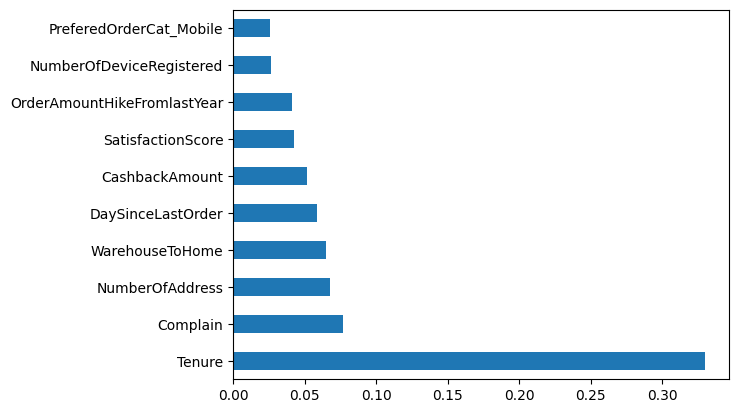

In [ ]:

#Selecttop 10 predictors:
random.seed(1299)
feature_imp = pd.Series(clf.feature_importances_, index = feature_list).sort_values(ascending = False)
feature_imp_sel = feature_imp.iloc[0:10] #33
feature_imp_sel_s = feature_imp_sel.sort_values(ascending = False)
feature_plot_1 = feature_imp_sel_s.plot.barh()

In [ ]:
feature_imp

Tenure                                0.33026
Complain                              0.07666
NumberOfAddress                       0.06786
WarehouseToHome                       0.06484
DaySinceLastOrder                     0.05888
CashbackAmount                        0.05178
SatisfactionScore                     0.04265
OrderAmountHikeFromlastYear           0.04112
NumberOfDeviceRegistered              0.02674
PreferedOrderCat_Mobile               0.02550
CityTier                              0.02289
MaritalStatus_Single                  0.02227
OrderCount                            0.02164
PreferedOrderCat_Laptop & Accessory   0.02060
PreferredLoginDevice_Mobile           0.01358
PreferredLoginDevice_Computer         0.01346
MaritalStatus_Married                 0.01257
CouponUsed                            0.01174
PreferredPaymentMode_Credit Card      0.01167
PreferredPaymentMode_Debit Card       0.00925
PreferredPaymentMode_E wallet         0.00868
Gender_Female                     

In [ ]:
feature_imp.to_csv('feature_imp_a.csv',index=True, na_rep='NA')

In [ ]:
from sklearn.metrics import confusion_matrix

#ForvizinTableau
feature_imp_sel_df = pd.DataFrame(feature_imp_sel)
#feature_imp_sel_df.to_csv﴾'feature_imp_sel_sum.csv',index=True,na_rep='NA'﴿
random.seed(1299)
confusion_matrix(y_test, y_pred)

array([[802,   3],
       [ 43,  96]])

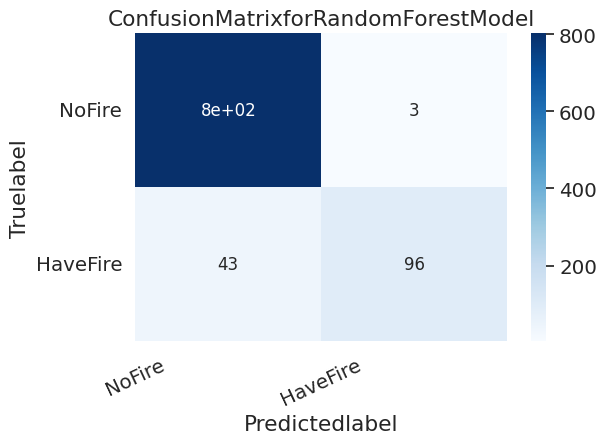

In [ ]:
import seaborn as sns

#Getandreshapeconfusionmatrixdata
random.seed(1299)
matrix = confusion_matrix(y_test, y_pred)
#Buildtheplot
plt.figure(figsize=(6,4))
sns.set(font_scale=1.3)
sns.heatmap(matrix, annot=True, annot_kws={'size':12},
cmap=plt.cm.Blues)
#Addlabelstotheplot
class_names = ['NoFire','HaveFire']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predictedlabel')
plt.ylabel('Truelabel')
plt.title('ConfusionMatrixforRandomForestModel')
plt.show()


In [ ]:
 print("ACCURACYOFTHEMODEL:", metrics.accuracy_score(y_test, y_pred))


ACCURACYOFTHEMODEL: 0.951271186440678


In [ ]:
from sklearn.metrics import classification_report

random.seed(1299)
print(classification_report(y_test, y_pred)) #model

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       805
           1       0.97      0.69      0.81       139

    accuracy                           0.95       944
   macro avg       0.96      0.84      0.89       944
weighted avg       0.95      0.95      0.95       944



In [ ]:

#Table1:Forclient:w/address&goecoordinates

result_3 = pd.read_csv('churn_prepered.csv')
result_3.info()
result_3.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CustomerID                           3774 non-null   int64  
 1   Churn                                3774 non-null   int64  
 2   Tenure                               3774 non-null   float64
 3   CityTier                             3774 non-null   int64  
 4   WarehouseToHome                      3774 non-null   float64
 5   HourSpendOnApp                       3774 non-null   float64
 6   NumberOfDeviceRegistered             3774 non-null   int64  
 7   SatisfactionScore                    3774 non-null   int64  
 8   NumberOfAddress                      3774 non-null   int64  
 9   Complain                             3774 non-null   int64  
 10  OrderAmountHikeFromlastYear          3774 non-null   float64
 11  CouponUsed                    

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.00000,3,6.00000,3.00000,3,2,9,1,...,True,False,False,False,True,False,False,False,False,True
1,50004,1,0.00000,3,15.00000,2.00000,4,5,8,0,...,False,True,False,False,True,False,False,False,False,True
2,50006,1,0.00000,1,22.00000,3.00000,5,5,2,1,...,True,False,False,False,False,True,False,False,False,True
3,50012,1,11.00000,1,6.00000,3.00000,4,3,10,1,...,False,True,True,False,False,False,False,False,False,True
4,50013,1,0.00000,1,11.00000,2.00000,3,3,2,1,...,False,True,False,False,False,True,False,False,False,True


In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
predprob =clf.predict_proba(result_3.drop(['Churn', 'CustomerID'], axis = 1))
pd.DataFrame(predprob).shape
result_data = pd.concat([result_3[['CustomerID']].reset_index(drop=True),
                        pd.DataFrame(predprob[:,1], columns=['PredictedChurnProbability'])],
                        axis=1)
#functiontoclassifyriskbasedonprobability
def churn_risk(prob):
  return np.where(prob<1/3,'LowRisk',
        np.where(prob<2/3, 'ModerateRisk',
        np.where(prob<=1, 'HighRisk', np.nan)))


In [ ]:
result_3.head()


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.00000,3,6.00000,3.00000,3,2,9,1,...,False,False,False,False,True,False,False,False,False,True
1,50004,1,0.00000,3,15.00000,2.00000,4,5,8,0,...,False,False,True,False,True,False,False,False,False,True
2,50006,1,0.00000,1,22.00000,3.00000,5,5,2,1,...,False,False,False,False,False,False,True,False,False,True
3,50012,1,11.00000,1,6.00000,3.00000,4,3,10,1,...,False,False,True,False,False,False,False,False,False,True
4,50013,1,0.00000,1,11.00000,2.00000,3,3,2,1,...,False,False,True,False,False,True,False,False,False,True


In [ ]:
from datetime import date

#W/Googlename
#Colsforchartresult_r2B.columns﴿﴿#AptName_ys
data = {'CustomerID' :result_3.CustomerID,
        'Tenure': result_3.Tenure,
        'DaySinceLastOrder':result_3.DaySinceLastOrder,
        'CashbackAmount':result_3.CashbackAmount,
        'DaySinceLastOrder':result_3.DaySinceLastOrder, #result_r2
        'PredictedChurnRisk': churn_risk(predprob[:,1]),
        'PredictedChurnProbability':predprob[:,1],
        'CurrentDate':date.isoformat(date.today())
      }
pred_addr_g=pd.DataFrame(data=data)
#pred_addr_g['District']=pred_addr_g['District'].fillna﴾''﴿
pred_addr_g_sort = pred_addr_g.sort_values(by='PredictedChurnProbability',ascending=False)
pred_addr_g_sort.head()
#forinternaluse

,CustomerID,Tenure,DaySinceLastOrder,CashbackAmount,PredictedChurnRisk,PredictedChurnProbability,CurrentDate
3332,55053,1.00000,1.00000,144,HighRisk,0.98970,2024-04-23
2213,53583,1.00000,1.00000,144,HighRisk,0.98970,2024-04-23
2065,53379,1.00000,1.00000,146,HighRisk,0.98752,2024-04-23
3184,54849,1.00000,1.00000,146,HighRisk,0.98752,2024-04-23
2388,53827,1.00000,1.00000,149,HighRisk,0.98709,2024-04-23
